In [ ]:
import numpy as np
import pandas as pd

In [ ]:
mytext = "we run up the mountain yesterday the night sky was full of stars I've never seen so many stars in the sky before it was such a heavenly view forever remeber it in the bottom of my heart"

In [ ]:
vad_scores=pd.read_csv("/models/vad-nrc-csv/NRC-VAD-Lexicon.csv", index_col='Word')

In [ ]:
# vad_scores=pd.read_csv("/models/vad-nrc-csv/NRC-VAD-Lexicon_Bipolar.csv", index_col='Word')

In [ ]:
vad_scores

,Valence,Arousal,Dominance
Word,,,
aaaaaaah,0.479,0.606,0.291
aaaah,0.520,0.636,0.282
aardvark,0.427,0.490,0.437
aback,0.385,0.407,0.288
abacus,0.510,0.276,0.485
...,...,...,...
zoo,0.760,0.520,0.580
zoological,0.667,0.458,0.492
zoology,0.568,0.347,0.509


In [ ]:
def calculate_average_vad(text):
    """
    Calculate average Valence, Arousal, and Dominance (VAD) scores for the given text.

    Args:
    - text (str): The input text for which VAD scores are calculated.

    Returns:
    - List of tuples: List containing tuples with labels ('valence', 'arousal', 'dominance') and corresponding numerical values.
    """
    word_count, position = 0, 0  # Initialize counters for words and positions in the text
    cumulative_vad = np.zeros([3,])  # Initialize an array to store cumulative VAD scores

    # Loop through each word in the input text
    for word in text.split(' '):
        polarity = 1  # Default polarity is positive

        # Check if the previous words contain negation terms
        negation_terms = ['no', 'not', 'n\'t']
        if word in vad_scores.index and any(term in text.split(' ')[position-6:position] for term in negation_terms):
            polarity = -1  # Reverse polarity if negation terms are present

        # Update cumulative VAD scores for the text based on the current word
        if word in vad_scores.index:
            cumulative_vad += vad_scores.loc[word] * polarity
            word_count += 1  # Increment the word counter

        position += 1  # Increment the position counter in the text

    # Calculate average Valence, Arousal, and Dominance scores for the entire text
    average_vad = cumulative_vad / word_count if word_count > 0 else np.zeros([3,])

    # Return the result as a list of tuples with labels
    labels = ['valence', 'arousal', 'dominance']
    result_list = [(label, avg) for label, avg in zip(labels, average_vad)]
    return result_list

# Example usage:
# average_vad_list = calculate_average_vad(text, vad_scores)

In [ ]:
ans1 = calculate_average_vad(mytext)
ans1

[('valence', 0.7255384615384616),
 ('arousal', 0.4043076923076923),
 ('dominance', 0.5056923076923077)]

In [ ]:
text2 = '''
All smiles, I know what it takes to fool this town
I'll do it 'til the sun goes down
And all through the nighttime
Oh, yeah
Oh, yeah, I'll tell you what you wanna hear
Leave my sunglasses on while I shed a tear
It's never the right time
Yeah, yeah
I put my armor on, show you how strong I am
I put my armor on, I'll show you that I am
I'm unstoppable
I'm a Porsche with no brakes
I'm invincible
Yeah, I win every single game
I'm so powerful
I don't need batteries to play
I'm so confident
Yeah, I'm unstoppable today
Unstoppable today
Unstoppable today
Unstoppable today
I'm unstoppable today
Break down, only alone I will cry out loud
You'll never see what's hiding out
Hiding out deep down
Yeah, yeah
I know, I've heard that to let your feelings show
Is the only way to make friendships grow
But I'm too afraid now
Yeah, yeah
I put my armor on, show you how strong I am
I put my armor on, I'll show you that I am
I'm unstoppable
I'm a Porsche with no brakes
I'm invincible
Yeah, I win every single game
I'm so powerful
I don't need batteries to play
I'm so confident
Yeah, I'm unstoppable today
Unstoppable today
Unstoppable today
Unstoppable today
I'm unstoppable today
Unstoppable today
Unstoppable today
Unstoppable today
I'm unstoppable today
I put my armor on, show you how strong I am
I put my armor on, I'll show you that I am
I'm unstoppable
I'm a Porsche with no brakes
I'm invincible
Yeah, I win every single game
I'm so powerful
I don't need batteries to play
I'm so confident
Yeah, I'm unstoppable today
Unstoppable today
Unstoppable today
Unstoppable today
I'm unstoppable today
Unstoppable today
Unstoppable today
Unstoppable today
I'm unstoppable today
'''

In [ ]:
ans2 = calculate_average_vad(text2)
ans2

[('valence', 0.44210714285714275),
 ('arousal', 0.4721964285714288),
 ('dominance', 0.47998214285714264)]

In [ ]:
class EmotionCalculator:
    @staticmethod
    def calculate_angle(arousal, valence):
        # Scale arousal and valence to [-1, 1] range
        arousal_scaled = 2 * arousal - 1
        valence_scaled = 2 * valence - 1
        # Calculate the angle in radians
        angle_rad = np.arctan2(arousal_scaled, valence_scaled)
        # Convert radians to degrees
        angle_deg = np.degrees(angle_rad)
        # Ensure angle is positive
        if angle_deg < 0:
            angle_deg += 360
        return angle_deg

    @staticmethod
    def determine_quadrant(angle_deg):
        if 0 <= angle_deg < 90:
            return "QUAD1"
        elif 90 <= angle_deg < 180:
            return "QUAD2"
        elif 180 <= angle_deg < 270:
            return "QUAD3"
        else:
            return "QUAD4"

    @staticmethod
    def determine_emotion(quadrant_name):
        if quadrant_name == "QUAD1":
            return "Happiness"
        elif quadrant_name == "QUAD2":
            return "Anger"
        elif quadrant_name == "QUAD3":
            return "Sadness"
        else:
            return "Calmness"

In [ ]:
def getEmotions(arousal, valence):

    print(arousal, valence)

    # Determine angle
    angle_deg = EmotionCalculator.calculate_angle(arousal, valence)

    print(angle_deg)

    # Determine quadrant
    quadrant = EmotionCalculator.determine_quadrant(angle_deg)

    print(quadrant)

    # Determine emotion
    emotion = EmotionCalculator.determine_emotion(quadrant)

    print(emotion)

In [ ]:
getEmotions(ans1[1][1], ans1[0][1])

0.4043076923076923 0.7255384615384616
337.00927584832436
QUAD4
Calmness


In [ ]:
getEmotions(ans2[1][1], ans2[0][1])

0.4721964285714288 0.44210714285714275
205.65307002860843
QUAD3
Sadness


Find Similarities

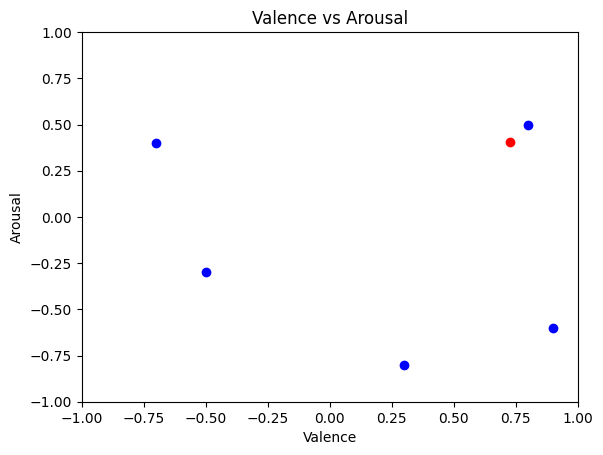

In [ ]:
import matplotlib.pyplot as plt

# Sample valence and arousal values
valence_values = [0.8, -0.5, 0.3, -0.7, 0.9]
arousal_values = [0.5, -0.3, -0.8, 0.4, -0.6]

# Coordinates of the red point
red_valence = 0.7255384615384616
red_arousal = 0.4043076923076923

# Plotting the valence and arousal values as a scatter plot
plt.scatter(valence_values, arousal_values, color='blue')

# Plotting the red point
plt.scatter(red_valence, red_arousal, color='red')

# Setting x and y axis limits to [-1, 1]
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Adding labels and title
plt.title('Valence vs Arousal')
plt.xlabel('Valence')
plt.ylabel('Arousal')

# Display the plot
plt.show()

In [ ]:
# Calculating distances and appending to a list
distances = []
for valence, arousal in zip(valence_values, arousal_values):
    distance = np.sqrt((red_valence - valence)**2 + (red_arousal - arousal)**2)
    distances.append(distance)

distances

[0.12124990087228303,
 1.4135041019232473,
 1.2772783565065213,
 1.4255449700161906,
 1.0193482080382392]

Alpha (Slope):

The value of alpha determines the slope of the sigmoid curve.
A higher value of alpha makes the similarity percentage decrease more rapidly with increasing distance, resulting in a steeper curve.
Conversely, a lower value of alpha makes the similarity percentage decrease more gradually, resulting in a smoother curve.
Choose alpha based on the rate at which you want the similarity percentage to decrease with distance. If you want a more gradual transition, use a lower alpha; if you want a sharper transition, use a higher alpha.

Beta (Midpoint):

The value of beta determines the midpoint of the sigmoid curve.
It represents the distance at which the similarity percentage is 50%.
Adjust beta based on the typical distance between points where you want the similarity to be around 50%.
If you expect most similar points to have distances close to zero, set beta closer to zero. If you expect a wider range of distances for similar points, adjust beta accordingly.

In [ ]:
# distances = [0.12124990087228303, 0.23, 0.32, 0.001, 0.55]

In [ ]:
def calculate_similarity(distance):
    # Define parameters for the sigmoid function
    alpha = 10  # Adjust the slope of the sigmoid function
    beta = 0.5  # Adjust the midpoint of the sigmoid function

    # Calculate the similarity percentage using a sigmoid function
    similarity_percentage = 100 / (1 + np.exp(alpha * (distance - beta)))

    print(similarity_percentage)

    return similarity_percentage

In [ ]:
for distance in distances:
  calculate_similarity(distance)

97.78496145405846
0.010780906262915063
0.04208624431238035
0.009558016056724348
0.5521976839559362


Test

In [4]:
import numpy as np

In [1]:
text_va = {
"arousal": -0.2684444444444445,
"valence": 0.477111111111111
}

arousal = 0.822

valence = 0.361

In [26]:
def get_distance_similarity(text_va, lyrics_arousal, lyrics_valence):

    lyrics_arousal = 2 * lyrics_arousal - 1
    lyrics_valence = 2 * lyrics_valence - 1

    distance = np.sqrt((text_va['arousal'] - lyrics_arousal)**2 + (text_va['valence'] - lyrics_valence)**2)

    print(distance)

    # Define parameters for the sigmoid function
    alpha = 10  # Adjust the slope of the sigmoid function
    beta = 1.4  # Adjust the midpoint of the sigmoid function

    # Calculate the similarity percentage using a sigmoid function
    similarity_percentage = 100 / (1 + np.exp(alpha * (distance - beta)))

    return similarity_percentage

In [27]:
get_distance_similarity(text_va, arousal, valence)

1.1843764833535777


89.62499938314244